# Polynomial Curve Fitting

A regression problem based on the sinusoidal function.

Example: Suppose we observe a real-valued input variable x and we wish to use this observation to predict the value of a real-valued target variable t.

In these example we have the underlying function, but in many case, users don't have the function, sou as we shall see below, the objective is discover it.

x is generated by choosing values of x_n, where n =1,...,N, spaced uniformly in range [0, 1]
t target data set was obtained by first computing the corresponding values of the function sin(2πx) and then adding a small level of random noise having a Gaussian distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

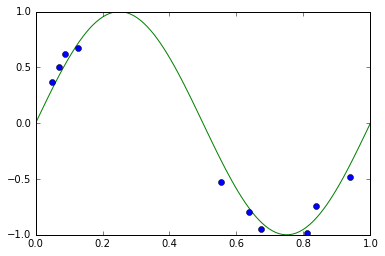

In [2]:
samples = 10
x = np.sort(np.random.uniform(0,1,samples))
t = np.sin(2*np.pi*x) + np.random.normal(scale = 0.1, size=samples)

lin = np.linspace(0,1,samples*10)
plt.plot(lin, np.sin(2*np.pi*lin),'-g')
plt.plot(x, t,'bo')
plt.show()

In [3]:
#The probability density for the Gaussian distribution is
#std = standard_deviation 
mean = lambda x : np.sum(x)/x.__len__()
std = lambda x,mean : np.sqrt(np.sum([(i-mean)**2 for i in x])/x.__len__())
variance = lambda x,mean : (np.sum([(i-x.mean())**2 for i in x])/x.__len__())
PDF_normal_distribution = \
                        lambda x,mean,std,variance :((1./np.sqrt(2.*np.pi*(std**2))) * np.exp(-( x[i] - mean)**2/2.*(variance)))

print (mean(x), x.mean())
print (std(x,mean(x)), x.std())
print (variance(x,mean(x)), np.var(x))
#print (PDF_normal_distribution(x,mean(x),std(x,mean(x)),variance(x,mean(x))), \
 #      np.random.normal(loc=mean(x), scale = std(x,mean(x))))

0.479026540659 0.479026540659
0.338749320573 0.338749320573
0.114751102188 0.114751102188


# Curve Fitting, using a polynomial funtion

In [18]:
samples = 10
fitpolinomial = 2
x = np.sort(np.random.uniform(0, 1, samples))
t = np.sin(2*np.pi*x) + np.random.normal(scale = 0.1, size=samples)
w = 1
t_fit = sum([(w*(x**i)) for i in range(fitpolinomial)])


In [21]:
(1/2)*sum((x-t)**2)

6.3957617422129687

In [ ]:

lin = np.linspace(0,1,samples*10)
plt.plot(lin, np.sin(2*np.pi*lin),'-g')
plt.plot(x, t,'bo')
plt.plot(x, t_fit,'-r')
#plt.show()

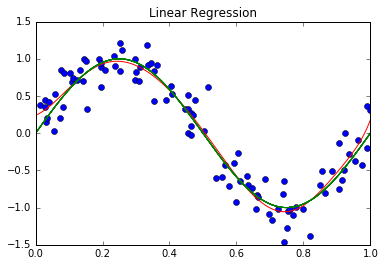

In [45]:
samples = 100
fitpolinomial = 10
x = np.sort(np.random.uniform(0, 1, samples))
t = np.sin(2*np.pi*x) + np.random.normal(scale = 0.3, size=samples)

x = np.asmatrix([x**i for i in range(fitpolinomial)]).T
t = np.asmatrix(t).T

w = ((x.T*x)**(-1))*x.T*t

lin = np.linspace(0, 1, samples*10)
lin = np.asmatrix([lin**i for i in range(fitpolinomial)]).T

plt.plot(np.array(x[:,1]), np.array(t),'bo')
plt.plot(np.array(lin[:,1]),np.array(lin*w),'-r')
plt.plot(lin, np.sin(2*np.pi*lin),'-g')
plt.title('Linear Regression')
plt.show()